## Penjelasan Dataset yang digunakan

In [49]:
#Spam_Detection
#Tuti Maesaroh 10222080

#Penjelasan DATASET
#1. Kasus yang diambil
# Kasus ini adalah klasifikasi pesan SMS menjadi dua kategori, yaitu spam dan ham (pesan normal).
# Tujuannya untuk membangun model machine learning yang bisa mendeteksi apakah sebuah pesan merupakan spam atau bukan.

#2. Penjelasan setiap kolom
# Dataset memiliki dua kolom utama:
# 1. v1 → Label pesan ('ham' = normal, 'spam' = pesan sampah)
# 2. v2 → Teks pesan SMS

#3. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Tuti
[nltk_data]     Maesaroh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
data = pd.read_csv("spam.csv", encoding='latin-1')
data = data.rename(columns={"v1": "label", "v2": "message"})
data = data[["label", "message"]]
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Understanding

In [16]:
# 1. Jumlah baris data
print("Jumlah baris data:", len(data))

Jumlah baris data: 5572


In [17]:
# 2. Panjang rata-rata setiap pesan
data['length'] = data['message'].apply(len)
print("Rata-rata panjang pesan:", data['length'].mean())


Rata-rata panjang pesan: 80.11880832735105


In [18]:
# 3. Cek data duplikasi
print("Jumlah data duplikat:", data.duplicated().sum())

Jumlah data duplikat: 403


In [19]:
# 4. Cek data kosong
print("Jumlah data kosong:\n", data.isnull().sum())


Jumlah data kosong:
 label      0
message    0
length     0
dtype: int64


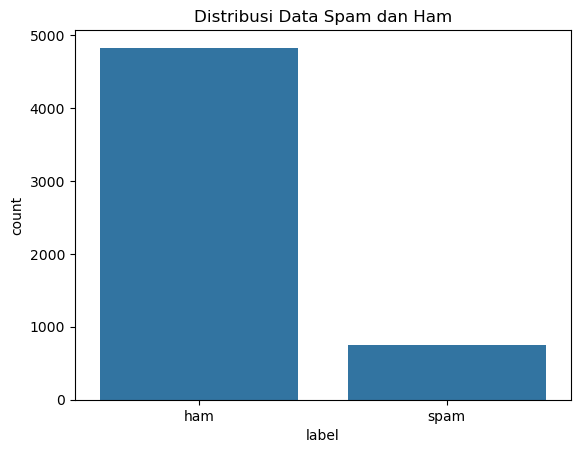

In [20]:
# 5. Distribusi label
sns.countplot(x='label', data=data)
plt.title('Distribusi Data Spam dan Ham')
plt.show()

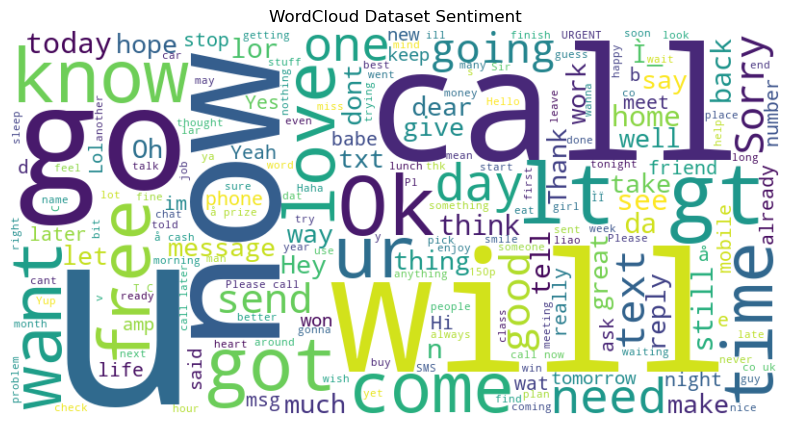

In [50]:
# Wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(df['message'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Dataset Sentiment")
plt.show()


## Data Text Processing

In [21]:
# 1. Tokenisasi
from nltk.tokenize import word_tokenize

text = "Aku sangat senang belajar Machine Learning!"
tokens = word_tokenize(text.lower())
print(tokens)


['aku', 'sangat', 'senang', 'belajar', 'machine', 'learning', '!']


In [24]:
#2. Lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
print(lemmatized)


['aku', 'sangat', 'senang', 'belajar', 'machine', 'learning', '!']


In [25]:
#3. Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmed = [stemmer.stem(token) for token in tokens]
print(stemmed)


['aku', 'sangat', 'senang', 'belajar', 'machin', 'learn', '!']


In [26]:
#4. Stopword Removal (dan pembersihan tanda baca/angka)
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian'))
cleaned = [word for word in stemmed if word not in stop_words and word not in string.punctuation]
print(cleaned)


['senang', 'belajar', 'machin', 'learn']


In [27]:
#5. Normalisasi Teks
normalisasi = {
    "gk": "tidak", "ga": "tidak", "yg": "yang", "dlm": "dalam", "dgn": "dengan"
}
normalized = [normalisasi.get(word, word) for word in cleaned]
print(normalized)


['senang', 'belajar', 'machin', 'learn']


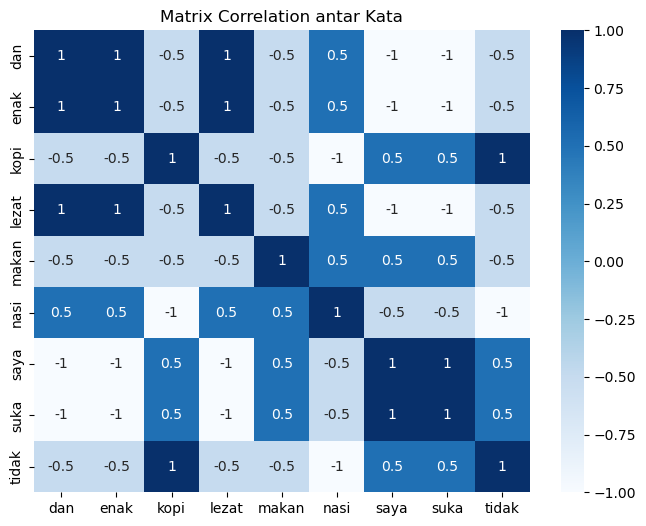

In [30]:
#6. Matrix Correlation
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh data
texts = ["saya suka makan nasi", 
         "saya tidak suka kopi", 
         "nasi enak dan lezat"]

# Buat matriks kemunculan kata
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Ubah ke DataFrame
df_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Hitung korelasi antar kata
corr = df_matrix.corr()

# Visualisasi korelasi (heatmap)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Matrix Correlation antar Kata")
plt.show()


In [33]:
#7. Labeling Data (Sentiment / Polarity)
import nltk
nltk.download('sentiwordnet')

from nltk.corpus import sentiwordnet as swn

def get_sentiment_score(word):
    synsets = list(swn.senti_synsets(word))
    if len(synsets) > 0:
        s = synsets[0]
        return s.pos_score() - s.neg_score()
    else:
        return 0

# Contoh
words = ["good", "bad", "happy", "sad"]
scores = [get_sentiment_score(w) for w in words]

for w, s in zip(words, scores):
    print(w, ":", s)


[nltk_data] Downloading package sentiwordnet to C:\Users\Tuti
[nltk_data]     Maesaroh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\sentiwordnet.zip.


good : 0.5
bad : -0.875
happy : 0.875
sad : -0.625


In [37]:
#Text Vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform([' '.join(normalized)])


In [42]:
#Data Splitting
import pandas as pd

# Ganti path di bawah ini sesuai dengan lokasi file kamu
df = pd.read_csv("spam.csv", encoding="latin-1")

# Hapus kolom yang tidak dipakai
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Lihat 5 data pertama
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


## Data Modeling

In [11]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load dataset (gunakan file spam.csv dari Kaggle)
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

# Tampilkan beberapa data awal
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Ubah label ke bentuk numerik (0 = ham, 1 = spam)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Pisahkan data training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label_num'], test_size=0.2, random_state=42
)

# Tokenisasi teks
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Konversi teks ke urutan angka
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)

# Padding agar panjang teks seragam
max_length = 100
X_train_padded = pad_sequences(train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(test_seq, maxlen=max_length, padding='post')

print("Jumlah data latih:", len(X_train_padded))
print("Jumlah data uji:", len(X_test_padded))

Jumlah data latih: 4457
Jumlah data uji: 1115


In [26]:
import pandas as pd

# Ganti nama file sesuai punyamu
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
df = df[['label', 'message']]  

# Tampilkan nama kolom
print(df.columns)


Index(['label', 'message'], dtype='object')


In [28]:
#Tokenisasi dan Pembagian Data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['message'])
sequences = tokenizer.texts_to_sequences(df['message'])
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

le = LabelEncoder()
labels = le.fit_transform(df['label'])

X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)


In [30]:
#Bangun dan Latih Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(max_words, 64, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#  tambahkan baris ini biar modelnya "dibangun"
model.build(input_shape=(None, max_len))

# Sekarang baru tampilkan
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,137 (1.35 MB)

 Trainable params: 355,137 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# TRAINING MODEL SPAM DETECTION (LSTM)
history = model.fit(
    X_train, 
    y_train, 
    epochs=5, 
    batch_size=32, 
    validation_split=0.2, 
    verbose=1
)


Epoch 1/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.8617 - loss: 0.4143 - val_accuracy: 0.8621 - val_loss: 0.4029
Epoch 2/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8670 - loss: 0.3977 - val_accuracy: 0.8621 - val_loss: 0.4025
Epoch 3/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8670 - loss: 0.3970 - val_accuracy: 0.8621 - val_loss: 0.4022
Epoch 4/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.8670 - loss: 0.3968 - val_accuracy: 0.8621 - val_loss: 0.4013
Epoch 5/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8670 - loss: 0.3959 - val_accuracy: 0.8621 - val_loss: 0.4018


## Data Evaluasi

In [33]:
#Prediksi
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [34]:
#Akurasi Keseluruhan
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {acc*100:.2f}%")


Akurasi Model: 86.55%


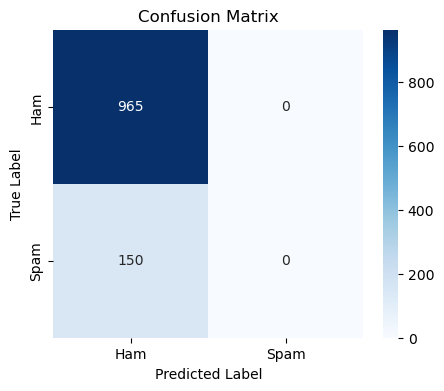

In [35]:
#Confussion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Ham', 'Spam']

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [36]:
#Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))



Classification Report:
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       965
        spam       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



C:\Users\Tuti Maesaroh\.conda\envs\kelompok2\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Tuti Maesaroh\.conda\envs\kelompok2\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Tuti Maesaroh\.conda\envs\kelompok2\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

## Perbandingan Model apabila menggunakan beberapa algoritma

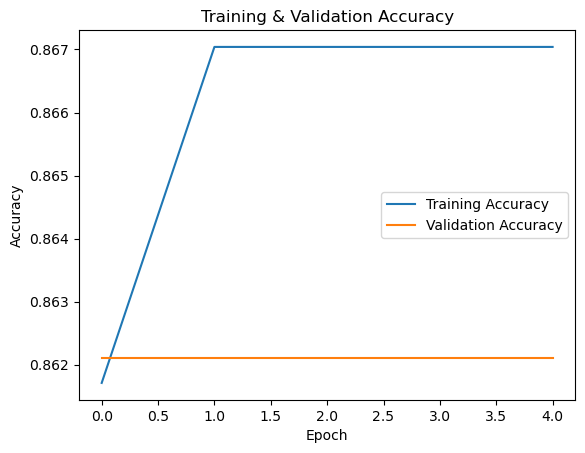

In [40]:
# Grafik Akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

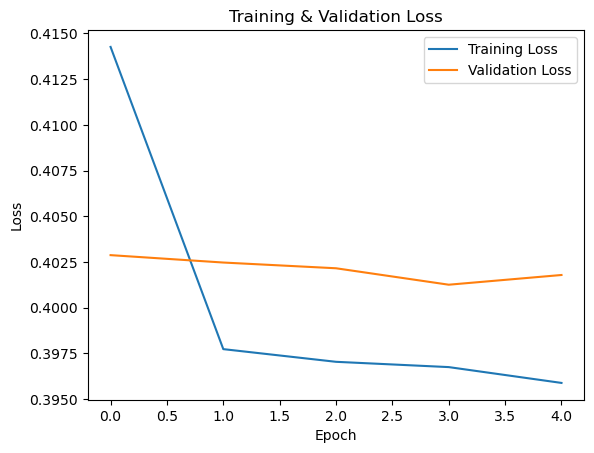

In [44]:
# Grafik Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()